<a href="https://colab.research.google.com/github/OlegBogutsky/nn2022/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота № 4
---
## Виконав Богуцький Олег, КН-31
### Завдання:
1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
---
#Хід роботи


Імпортуємо необхідні бібліотеки та завантажуємо дані.

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Виділяємо необхідні нам класи у навчальній вибірці

In [3]:
train_data1 = []
train_labels1 = []
for data in range(len(train_data)):
  if(train_labels[data] == 1 or train_labels[data] == 4 or train_labels[data] == 8):
    train_data1 = np.append(train_data1, train_data[data])
    train_labels1 = np.append(train_labels1, train_labels[data])
print(len(train_data1))
print(train_labels1)

14112000
[1. 4. 1. ... 1. 8. 1.]


Виділяємно необхідні нам класи в тестовій вибірці

In [4]:
test_data1 = []
test_labels1 = []
for data in range(len(test_data)):
  if(test_labels[data] == 1 or test_labels[data] == 4 or test_labels[data] == 8):
    test_data1 = np.append(test_data1, test_data[data])
    test_labels1 = np.append(test_labels1, test_labels[data])
print(len(test_data1))
print(len(test_labels1))

2352000
3000


reshape

In [5]:
train_data1 = np.reshape(train_data1, (len(train_labels1), 28, 28))

In [6]:
test_data1 = np.reshape(test_data1, (len(test_labels1), 28, 28))

Нормалізуємо вхідні дані.

In [7]:
train_data1 = train_data1 / 255
test_data1 = test_data1 / 255

Навчаємо нейромережу.

In [17]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/200))

find_lr_history = model_13.fit(train_data1,
                               train_labels1,
                               epochs=40,
                               validation_data=(test_data1, test_labels1),
                               callbacks=[lr_scheduler])


Epoch 1/40
563/563 [==============================] - 3s 5ms/step - loss: 1.1819 - accuracy: 0.6773 - val_loss: 0.2151 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0882 - accuracy: 0.9781 - val_loss: 0.0789 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0635 - accuracy: 0.9832 - val_loss: 0.0625 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 4/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0548 - accuracy: 0.9857 - val_loss: 0.0567 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 5/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9869 - val_loss: 0.0520 - val_accuracy: 0.9873 - lr: 0.0010
Epoch 6/40
563/563 [==============================] - 2s 4ms/step - loss: 0.0435 - accuracy: 0.9879 - val_loss: 0.0568 - val_accuracy: 0.9860 - lr: 0.0011
Epoch 7/40
563/563 [==============================] - 2s 4ms/step - lo

Тестуємо та рахуємо метрики.

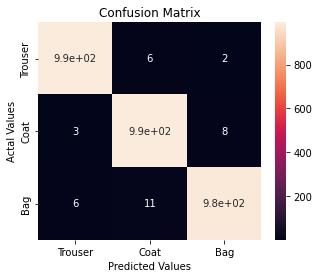

Accuracy of classification = 0.988


In [34]:
predictions = model_13.predict(test_data1)

y = []
for data in predictions:
  index_max = np.argmax(data)
  y = np.append(y, index_max)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels1, y)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm_df = pd.DataFrame(cm,
                     index = ['Trouser','Coat','Bag'], 
                     columns = ['Trouser','Coat','Bag'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



accuracy =  (cm[0][0]+cm[1][1]+cm[2][2]) /(cm.sum())

print('Accuracy of classification = {:0.3f}'.format(accuracy))

Висновки: у цій лабораторній роботі я навчився отримувати набори даних з інтернету, приводити їх до потрібного вигляду, налаштовувати нейромережу та рахувати метрики для багатокласової класифікації.